_____________________________________________________________________________________________

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_____________________________________________________________________________________________

**Loading Shark Attack Data**

In [2]:
file_path= "GSAF5.csv"

In [3]:
sharks_df = pd.read_csv(file_path)
sharks_df = sharks_df.dropna(thresh=2)
print(sharks_df.shape)

(6940, 15)


____________________________________________________________________________________________

**Cleaning Shark Attack DATE Data**

In [4]:
def contains_letters(s):
    """Takes a string and checks whether it contains any letters of the Latin alphabet. """
    return any(char.isalpha() for char in s)

In [5]:
def string_with_letters(series):
    """Applies contains.letters(s) to a pandas.Series"""
    for i in series:
        i=i.lower() #makes all letters lowercase
        if contains_letters(i) == True:
            date_list.append(i)
    return date_list 

#considering the report date as the actual date since it doesn't make much difference 
#if we are considering the month
#the list "date_list" contains the dates where the month is written in letters
#(I checked the dates where contains_letters(i) == False and there are only 6 dates that contain month information
# --> negligible 6/6000)

In [6]:
date_list = []
date_list = string_with_letters(sharks_df.Date)

In [7]:
type(date_list)

list

In [8]:
months_of_year = {"jan": "january",
                  "feb": "february",
                  "mar": "march",
                  "apr": "april",
                  "jun": "june",
                  "jul": "july",
                  "aug":"august",
                  "sep":"sept",
                  "oct":"october",
                  "nov":"november",
                  "dec":"december"
                    }

In [9]:
dictionary = months_of_year

data = date_list

months = list(dictionary.keys())


def contains_string(data,dictionary):
    month_count_jan = 0
    month_count_feb = 0
    month_count_mar = 0
    month_count_apr = 0
    month_count_may = 0
    month_count_jun = 0
    month_count_jul = 0
    month_count_aug = 0
    month_count_sep = 0
    month_count_oct = 0
    month_count_nov = 0
    month_count_dec = 0
    for i in data:
        if str.__contains__(i,"jan") == True:
            month_count_jan = month_count_jan + 1
        elif str.__contains__(i,"feb") == True:
            month_count_feb = month_count_feb + 1
        elif str.__contains__(i,"mar") == True:
            month_count_mar = month_count_mar + 1
        elif str.__contains__(i,"apr") == True:
            month_count_apr = month_count_apr + 1
        elif str.__contains__(i,"may") == True:
            month_count_may = month_count_may + 1
        elif str.__contains__(i,"jun") == True:
            month_count_jun = month_count_jun + 1
        elif str.__contains__(i,"jul") == True:
            month_count_jul = month_count_jul + 1
        elif str.__contains__(i,"aug") == True:
            month_count_aug = month_count_aug + 1
        elif str.__contains__(i,"sep") == True:
            month_count_sep = month_count_sep + 1
        elif str.__contains__(i,"oct") == True:
            month_count_oct = month_count_oct + 1
        elif str.__contains__(i,"nov") == True:
            month_count_nov = month_count_nov + 1
        elif str.__contains__(i,"dec") == True:
            month_count_dec = month_count_dec + 1
        else:
            pass
#        month_count_list = []
    return month_count_jan,month_count_feb,month_count_mar,month_count_apr,month_count_may,month_count_jun,month_count_jul,month_count_aug,month_count_sep,month_count_oct,month_count_nov,month_count_dec


months_count = np.array(contains_string(data,dictionary))
list_months_of_year = np.array(["January","February","March",
                                "April","May","June",
                                "July","August","September",
                                "October","November","December"])

In [10]:
sharks_df.Date.unique()

array(['14 Feb-2024', '04-Feb-2024', '29 Jan-2024', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

In [11]:
sharks_df.Date.isna().value_counts()

Date
False    6940
Name: count, dtype: int64

In [12]:
df_year_counts = sharks_df.Year.value_counts()

In [13]:
#df_year_counts = df_year_counts.reset_index()
df_year_counts.sort_index

<bound method Series.sort_index of Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1819.0      1
Name: count, Length: 259, dtype: int64>

In [14]:
df_year_counts.max()

143

____________________________________________________________________________________________

**Examining Shark Attack Data**

In [15]:
#Already cleaned before uploaded:
#Deleted approx 60k empty rows.
#Converted values from str to num for year and age columns.

In [16]:
#There are 15 columns and 6940 rows.
sharks_df.shape

(6940, 15)

In [17]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

Date         0.000000
Year         0.028818
Type         0.259366
Country      0.720461
State        6.945245
Location     8.141210
Activity     8.429395
Name         3.155620
Sex          8.342939
Age         43.126801
Injury       0.504323
Fatal        8.083573
Time        50.792507
Species     45.129683
Source       0.273775
dtype: float64

In [18]:
display(sharks_df)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
0,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
1,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,N,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"
2,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,Right leg bitten,N,20h00,Bull shark,"Nine News, 12/31/2024"
3,15 Jan-2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,Paradise Island Resort,Swimming,male,M,10,Right leg injured,N,16h00,NaN,"Caribbean Loop News, 1/15;2024"
4,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Leg bitten,N,13h00,White shark,"A. Currie, GSAF"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6936,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6937,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6938,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


____________________________________________________________________________________________

**Cleaning The Data**

In [19]:
#Cleaning the "Year" column and converting to object
sharks_df["Year"] = sharks_df["Year"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Year"] = sharks_df["Year"].astype(str)  # Convert the column to string type

In [20]:
#Cleaning the "Fatal" column and converting to object
sharks_df["Fatal"] = sharks_df["Fatal"].fillna("UNKNOWN")  # Fill all empty cells with "UNKNOWN"
sharks_df["Fatal"] = sharks_df["Fatal"].replace({"M":"UNKNOWN","F":"UNKNOWN","Nq":"UNKNOWN","2017":"UNKNOWN",
                                                  "Y x 2":"UNKNOWN"," N":"N","N ":"N","y":"Y","n":"N"})

In [21]:
#Cleaning "Sex" column
sharks_df["Sex"] = sharks_df["Sex"].fillna("UNKNOWN") 
sharks_df["Sex"]=sharks_df["Sex"].replace({"Unknown":"UNKNOWN","lli":"UNKNOWN",
                                           "M x 2":"UNKNOWN","N":"UNKNOWN",
                                           ".":"UNKNOWN"," M":"M", 
                                           "M ":"M"})

In [22]:
#Cleaning "Type" column
sharks_df["Type"] = sharks_df["Type"].fillna("UNKNOWN") 
sharks_df["Type"]=sharks_df["Type"].replace({" Provoked":"Provoked","Boat":"Watercraft",
                                             "Sea Disaster":"Disaster","nan":"UNKNOWN","?":"UNKNOWN",
                                             "Unconfirmed":"UNKNOWN","Unverified":"UNKNOWN","Invalid":"UNKNOWN",
                                             "Under investigation":"UNKNOWN"})

In [23]:
#Cleaning "Country" column
sharks_df["Country"] = sharks_df["Country"].fillna("UNKNOWN") #Fill all empty cells with "UNKNOWN"
sharks_df["Country"] = sharks_df["Country"].str.strip() #remove all spaces
#Map all values to the correct country in uppercase or to UNKNOWN if not a coutnry.
sharks_df["Country"] = sharks_df["Country"].replace({
    'INDIA': 'INDIA',
    'TRINIDAD': 'TRINIDAD & TOBAGO',
    'AUSTRALIA': 'AUSTRALIA',
    'BAHAMAS': 'BAHAMAS',
    'SOUTH AFRICA': 'SOUTH AFRICA',
    'USA': 'USA',
    'MEXICO': 'MEXICO',
    'NEW ZEALAND': 'NEW ZEALAND',
    'EGYPT': 'EGYPT',
    'Mexico': 'MEXICO',
    'BELIZE': 'BELIZE',
    'PHILIPPINES': 'PHILIPPINES',
    'Coral Sea': 'UKNOWN',
    'SPAIN': 'SPAIN',
    'PORTUGAL': 'PORTUGAL',
    'SAMOA': 'SAMOA',
    'COLOMBIA': 'COLOMBIA',
    'ECUADOR': 'ECUADOR',
    'FRENCH POLYNESIA': 'FRENCH POLYNESIA',
    'NEW CALEDONIA': 'NEW CALEDONIA',
    'TURKS and CaICOS': 'TURKS & CAICOS',
    'CUBA': 'CUBA',
    'BRAZIL': 'BRAZIL',
    'SEYCHELLES': 'SEYCHELLES',
    'ARGENTINA': 'ARGENTINA',
    'FIJI': 'FIJI',
    'MeXICO': 'MEXICO',
    'Maldives': 'MALDIVES',
    'ENGLAND': 'ENGLAND',
    'JAPAN': 'JAPAN',
    'INDONESIA': 'INDONESIA',
    'JAMAICA': 'JAMAICA',
    'MALDIVES': 'MALDIVES',
    'THAILAND': 'THAILAND',
    'COLUMBIA': 'COLOMBIA',
    'COSTA RICA': 'COSTA RICA',
    'New Zealand': 'NEW ZEALAND',
    'British Overseas Territory': 'UKNOWN',
    'CANADA': 'CANADA',
    'JORDAN': 'JORDAN',
    'ST KITTS / NEVIS': 'NEVIS',
    'ST MARTIN': 'ST MARTIN',
    'PAPUA NEW GUINEA': 'PAPUA NEW GUINEA',
    'REUNION ISLAND': 'REUNION',
    'ISRAEL': 'ISRAEL',
    'CHINA': 'CHINA',
    'IRELAND': 'IRELAND',
    'ITALY': 'ITALY',
    'MALAYSIA': 'MALAYSIA',
    'LIBYA': 'LIBYA',
    'nan': 'UKNOWN',
    'MAURITIUS': 'MAURITIUS',
    'SOLOMON ISLANDS': 'SOLOMON ISLANDS',
    'ST HELENA, British overseas territory': 'ST HELENA',
    'COMOROS': 'COMOROS',
    'REUNION': 'REUNION',
    'UNITED KINGDOM': 'UNITED KINGDOM',
    'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES (UAE)',
    'CAPE VERDE': 'CAPE VERDE',
    'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC',
    'CAYMAN ISLANDS': 'CAYMAN ISLANDS',
    'ARUBA': 'ARUBA',
    'MOZAMBIQUE': 'MOZAMBIQUE',
    'PUERTO RICO': 'PUERTO RICO',
    'ATLANTIC OCEAN': 'UKNOWN',
    'GREECE': 'GREECE',
    'ST. MARTIN': 'ST MARTIN',
    'FRANCE': 'FRANCE',
    'TRINIDAD & TOBAGO': 'TRINIDAD & TOBAGO',
    'KIRIBATI': 'KIRIBATI',
    'DIEGO GARCIA': 'DIEGO GARCIA',
    'TAIWAN': 'TAIWAN',
    'PALESTINIAN TERRITORIES': 'PALESTINIAN TERRITORIES',
    'GUAM': 'GUAM',
    'NIGERIA': 'NIGERIA',
    'TONGA': 'TONGA',
    'SCOTLAND': 'SCOTLAND',
    'CROATIA': 'CROATIA',
    'SAUDI ARABIA': 'SAUDI ARABIA',
    'CHILE': 'CHILE',
    'ANTIGUA': 'ANTIGUA',
    'KENYA': 'KENYA',
    'RUSSIA': 'RUSSIA',
    'TURKS & CAICOS': 'TURKS & CAICOS',
    'UNITED ARAB EMIRATES (UAE)': 'UNITED ARAB EMIRATES (UAE)',
    'AZORES': 'AZORES',
    'SOUTH KOREA': 'SOUTH KOREA',
    'MALTA': 'MALTA',
    'VIETNAM': 'VIETNAM',
    'MADAGASCAR': 'MADAGASCAR',
    'PANAMA': 'PANAMA',
    'SOMALIA': 'SOMALIA',
    'NEVIS': 'NEVIS',
    'BRITISH VIRGIN ISLANDS': 'BRITISH VIRGIN ISLANDS',
    'NORWAY': 'NORWAY',
    'SENEGAL': 'SENEGAL',
    'YEMEN': 'YEMEN',
    'GULF OF ADEN': 'UKNOWN',
    'Sierra Leone': 'SIERRA LEONE',
    'ST. MAARTIN': 'ST MARTIN',
    'GRAND CAYMAN': 'GRAND CAYMAN',
    'Seychelles': 'SEYCHELLES',
    'LIBERIA': 'LIBERIA',
    'VANUATU': 'VANUATU',
    'HONDURAS': 'HONDURAS',
    'VENEZUELA': 'VENEZUELA',
    'SRI LANKA': 'SRI LANKA',
    'URUGUAY': 'URUGUAY',
    'MICRONESIA': 'MICRONESIA',
    'CARIBBEAN SEA': 'UKNOWN',
    'OKINAWA': 'JAPAN',
    'TANZANIA': 'TANZANIA',
    'MARSHALL ISLANDS': 'MARSHALL ISLANDS',
    'EGYPT / ISRAEL': 'UKNOWN',
    'NORTHERN ARABIAN SEA': 'UKNOWN',
    'HONG KONG': 'HONG KONG',
    'EL SALVADOR': 'EL SALVADOR',
    'ANGOLA': 'ANGOLA',
    'BERMUDA': 'BERMUDA',
    'MONTENEGRO': 'MONTENEGRO',
    'IRAN': 'IRAN',
    'TUNISIA': 'TUNISIA',
    'NAMIBIA': 'NAMIBIA',
    'NORTH ATLANTIC OCEAN': 'UKNOWN',
    'SOUTH CHINA SEA': 'UKNOWN',
    'BANGLADESH': 'BANGLADESH',
    'PALAU': 'PALAU',
    'WESTERN SAMOA': 'WESTERN SAMOA',
    'PACIFIC OCEAN': 'UKNOWN',
    'BRITISH ISLES': 'BRITISH ISLES',
    'GRENADA': 'GRENADA',
    'IRAQ': 'IRAQ',
    'TURKEY': 'TURKEY',
    'SINGAPORE': 'SINGAPORE',
    'NEW BRITAIN': 'UKNOWN',
    'SUDAN': 'SUDAN',
    'JOHNSTON ISLAND': 'JOHNSTON ISLAND',
    'SOUTH PACIFIC OCEAN': 'UKNOWN',
    'NEW GUINEA': 'NEW GUINEA',
    'RED SEA': 'UKNOWN',
    'NORTH PACIFIC OCEAN': 'UKNOWN',
    'FEDERATED STATES OF MICRONESIA': 'MICRONESIA',
    'MID ATLANTIC OCEAN': 'UKNOWN',
    'ADMIRALTY ISLANDS': 'ADMIRALTY ISLANDS',
    'BRITISH WEST INDIES': 'UNKNOWN',
    'SOUTH ATLANTIC OCEAN': 'UKNOWN',
    'PERSIAN GULF': 'UKNOWN',
    'RED SEA / INDIAN OCEAN': 'UKNOWN',
    'NORTH SEA': 'UKNOWN',
    'NICARAGUA': 'NICARAGUA',
    'MALDIVE ISLANDS': 'MALDIVES',
    'AMERICAN SAMOA': 'AMERICAN SAMOA',
    'ANDAMAN / NICOBAR ISLANDAS': 'UKNOWN',
    'GABON': 'GABON',
    'MAYOTTE': 'MAYOTTE',
    'THE BALKANS': 'UKNOWN',
    'SUDAN?': 'SUDAN',
    'MARTINIQUE': 'MARTINIQUE',
    'INDIAN OCEAN': 'UKNOWN',
    'GUATEMALA': 'GUATEMALA',
    'NETHERLANDS ANTILLES': 'UKNOWN',
    'NORTHERN MARIANA ISLANDS': 'NORTHERN MARIANA ISLANDS',
    'IRAN / IRAQ': 'UKNOWN',
    'JAVA': 'JAVA',
    'SIERRA LEONE': 'SIERRA LEONE',
    'CENTRAL PACIFIC': 'UKNOWN',
    'SOLOMON ISLANDS / VANUATU': 'UKNOWN',
    'SOUTHWEST PACIFIC OCEAN': 'UKNOWN',
    'BAY OF BENGAL': 'UKNOWN',
    'MID-PACIFC OCEAN': 'UKNOWN',
    'SLOVENIA': 'SLOVENIA',
    'CURACAO': 'CURACAO',
    'ICELAND': 'ICELAND',
    'ITALY / CROATIA': 'UKNOWN',
    'BARBADOS': 'BARBADOS',
    'MONACO': 'MONACO',
    'GUYANA': 'GUYANA',
    'HAITI': 'HAITI',
    'SAN DOMINGO': 'UKNOWN',
    'KUWAIT': 'KUWAIT',
    'FALKLAND ISLANDS': 'FALKLAND ISLANDS',
    'CRETE': 'CRETE',
    'CYPRUS': 'CYPRUS',
    'WEST INDIES': 'WEST INDIES',
    'BURMA': 'BURMA',
    'LEBANON': 'LEBANON',
    'PARAGUAY': 'PARAGUAY',
    'BRITISH NEW GUINEA': 'UKNOWN',
    'CEYLON': 'SRI LANKA',
    'OCEAN': 'UKNOWN',
    'GEORGIA': 'GEORGIA',
    'SYRIA': 'SYRIA',
    'TUVALU': 'TUVALU',
    'INDIAN OCEAN?': 'UKNOWN',
    'GUINEA': 'GUINEA',
    'ANDAMAN ISLANDS': 'ANDAMAN ISLANDS',
    'EQUATORIAL GUINEA / CAMEROON': 'UKNOWN',
    'COOK ISLANDS': 'COOK ISLANDS',
    'TOBAGO': 'TOBAGO',
    'PERU': 'PERU',
    'AFRICA': 'UKNOWN',
    'ALGERIA': 'ALGERIA',
    'Coast of AFRICA': 'UKNOWN',
    'TASMAN SEA': 'UKNOWN',
    'GHANA': 'GHANA',
    'GREENLAND': 'GREENLAND',
    'MEDITERRANEAN SEA': 'UKNOWN',
    'SWEDEN': 'SWEDEN',
    'ROATAN': 'ROATAN',
    'Between PORTUGAL & INDIA': 'UKNOWN',
    'DJIBOUTI': 'DJIBOUTI',
    'BAHREIN': 'BAHREIN',
    'KOREA': 'KOREA',
    'RED SEA?': 'UKNOWN',
    'ASIA?': 'UKNOWN',
    'CEYLON (SRI LANKA)': 'SRI LANKA',
    'nan':"UNKNOWN"
})
sharks_df["Country"] = sharks_df["Country"].str.upper()


In [24]:
sharks_df["Country"] = sharks_df["Country"].replace("UKNOWN", "UNKNOWN")

In [25]:
sharks_df['Age'] = sharks_df['Age'].astype(str)  # Convert the column to string type

def clean_age(age):
    if pd.isnull(age):
        return 'nan'  # Return 'nan' as string if input is NaN
    age = age.replace("s", "")  # Remove 's'
    age = age.replace("!", "")  # Remove '!'
    age = age.replace("/", "")  # Remove '/'
    age = age.replace("&", "")  # Remove "&"
    age = age.replace(" or ", "")  # Replace "or"
    age = age.replace("and", "")  # Remove 'and'
    age = age.replace("?", "") 
    age = age.replace("month", "1") 
    age = age.replace("teen", "15") 
    age = age.replace("Teen", "15") 
    age = age.replace("Both", "") 
    age = age.replace("young", "")  # Remove "young" without replacing with 'nan'
    age = age.replace("Elderly", "")  # Remove "Elderly" without replacing with 'nan'
    age = age.replace("a minor", "")  # Remove "a minor" without replacing with 'nan' 
    age = age.replace("(nan)", "")  # Remove "(nan)" without replacing with 'nan'
    age = age.replace("adult", "")  # Remove "adult" without replacing with 'nan'
    age = age.replace("(adult)", "")  # Remove "(adult)" without replacing with 'nan'
    age = age.split(" or ")[0]  # Extract the first age if multiple ages are present
    
    # Convert anything that is not a digit to NaN
    if not age.isdigit():
        return 'nan'
    
    # Convert age to float for comparison
    age = float(age)
    
    if age >= 99:
        return 'nan'
    
    return str(age)  # Convert the age back to string before returning

# Clean up the age entries
cleaned_ages = [clean_age(age) for age in sharks_df['Age']]

# Assign the cleaned ages back to the 'Age' column
sharks_df['Age'] = cleaned_ages

# Replace 'nan' string with actual NaN values
sharks_df['Age'].replace('nan', np.nan, inplace=True)

# Convert the 'Age' column to float type
sharks_df['Age'] = sharks_df['Age'].astype(float)

# Fill null values in the 'Age' column with the mean age calculated from non-null values
average_age = round(sharks_df["Age"].dropna().mean(), 0)
sharks_df["Age"].fillna(average_age, inplace=True)

# Convert the 'Age' column back to string type
sharks_df['Age'] = sharks_df['Age'].astype(str)





In [27]:
unique_ages = sharks_df['Age'].unique()
print(unique_ages)

['32.0' '28.0' '29.0' '10.0' '64.0' '62.0' '39.0' '22.0' '15.0' '16.0'
 '46.0' '21.0' '66.0' '52.0' '20.0' '44.0' '26.0' '47.0' '55.0' '30.0'
 '59.0' '8.0' '50.0' '45.0' '34.0' '38.0' '37.0' '9.0' '19.0' '35.0'
 '65.0' '77.0' '60.0' '49.0' '42.0' '2.0' '24.0' '73.0' '25.0' '18.0'
 '13.0' '11.0' '58.0' '67.0' '17.0' '14.0' '6.0' '41.0' '53.0' '68.0'
 '43.0' '40.0' '51.0' '31.0' '33.0' '56.0' '12.0' '36.0' '27.0' '57.0'
 '7.0' '71.0' '48.0' '54.0' '75.0' '61.0' '70.0' '23.0' '4.0' '63.0'
 '74.0' '69.0' '3.0' '82.0' '72.0' '5.0' '86.0' '84.0' '87.0' '1.0' '81.0'
 '78.0']


In [28]:
#Cleaning the "Activity" data

sharks_df["Activity"].tail()
#Fill missing values
sharks_df['Activity'] = sharks_df['Activity'].fillna('unknown')
#Standardize Text Format
sharks_df['Activity'] = sharks_df['Activity'].str.lower()
#remove all spaces
sharks_df['Activity'] = sharks_df['Activity'].str.strip()
# categorize the activity 

def categorize_activity(activity):
    activity = str(activity).lower()
    if 'swim' in activity or 'wad' in activity or 'bath' in activity or "stand" in activity or "walk" in activity:
        return 'surfing'
    elif 'surf' in activity or "body boarding" in activity or "boogie boarding" in activity or "float" in activity or "treading water" in activity:
        return 'swimming'
    elif 'fish' in activity:
        return 'fishing'
    elif 'div' in activity or 'snorkel' in activity:
        return 'diving'
    elif 'boat' in activity or "kayak" in activity  or "canoe"in activity or "fell overboard" in activity  or "paddl" in activity or"row" in activity:
        return 'watercraft'
    elif "unknown" in activity : 
        return "unknown"
    else : 
        return "others activities" 
    
    
sharks_df['Activity'] = sharks_df['Activity'].apply(categorize_activity)
#Remarque :  si tu change  l'ordre de la condition the value count of activity change about 100  

In [29]:
#Cleaning the "Injury" data

sharks_df["Injury"].tail()

sharks_df['Injury'] = sharks_df['Injury'].fillna('unknown')
sharks_df['Injury'] = sharks_df['Injury'].str.lower()
sharks_df['Injury'] = sharks_df['Injury'].str.strip()

#Made the choice to pass "fatal" at the very bottom of the loop to priviledge categoriztion by injury type.
def categorize_injury(injury):
    injury = str(injury).lower()
    if 'foot' in injury or 'heel' in injury or 'toe' in injury or 'toes' in injury:
        return 'foot injury'
    elif 'leg' in injury or 'thigh' in injury  or 'ankle' in injury or 'calf' in injury or 'shin' in injury or 'knee' in injury:
        return 'leg injury'
    elif 'arm' in injury:
        return 'arm injury'
    elif 'hand' in injury:
        return 'hand injury'
    elif 'head' in injury:
        return 'head injury'
    elif 'torso' in injury or 'chest' in injury:
        return 'torso injury'
    elif 'minor' in injury or 'abrasions' in injury or 'abrasion' in injury or 'recovered' in injury:
        return 'minor injury'
    elif 'bite' in injury or 'bitten' in injury:
        return 'bite'
    elif 'laceration' in injury:
        return 'laceration'
    elif 'missing' in injury:
        return 'missing'
    elif "no injury" in injury: 
        return "no injury"
    elif 'fatal' in injury or 'drown' in injury:
        return 'fatal'
    elif "unknown" in injury: 
        return "unknown"
    else:
        return "other"


sharks_df['Injury'] = sharks_df['Injury'].apply(categorize_injury)

In [30]:
#Checking result of cleaning "Injury column"
unique_times = sharks_df['Injury'].value_counts().head(30)
print(unique_times)

Injury
leg injury      1894
fatal           1105
foot injury      970
no injury        693
other            550
arm injury       527
bite             354
hand injury      340
minor injury     245
laceration        82
torso injury      78
head injury       46
unknown           43
missing           13
Name: count, dtype: int64


In [31]:
# Printing unique values for country and sorting alphabetically to spot final issues
def print_unique_values(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        unique_values = [str(value) for value in unique_values]  # Convert all values to strings
        unique_values.sort()
        print(column + ":")
        for value in unique_values:
            print(value)
print_unique_values(sharks_df, ["Country"])

Country:
ADMIRALTY ISLANDS
ALGERIA
AMERICAN SAMOA
ANDAMAN ISLANDS
ANGOLA
ANTIGUA
ARGENTINA
ARUBA
AUSTRALIA
AZORES
BAHAMAS
BAHREIN
BANGLADESH
BARBADOS
BELIZE
BERMUDA
BRAZIL
BRITISH ISLES
BRITISH VIRGIN ISLANDS
BURMA
CANADA
CAPE VERDE
CAYMAN ISLANDS
CHILE
CHINA
COLOMBIA
COMOROS
COOK ISLANDS
COSTA RICA
CRETE
CROATIA
CUBA
CURACAO
CYPRUS
DIEGO GARCIA
DJIBOUTI
DOMINICAN REPUBLIC
ECUADOR
EGYPT
EL SALVADOR
ENGLAND
FALKLAND ISLANDS
FIJI
FRANCE
FRENCH POLYNESIA
GABON
GEORGIA
GHANA
GRAND CAYMAN
GREECE
GREENLAND
GRENADA
GUAM
GUATEMALA
GUINEA
GUYANA
HAITI
HONDURAS
HONG KONG
ICELAND
INDIA
INDONESIA
IRAN
IRAQ
IRELAND
ISRAEL
ITALY
JAMAICA
JAPAN
JAVA
JOHNSTON ISLAND
JORDAN
KENYA
KIRIBATI
KOREA
KUWAIT
LEBANON
LIBERIA
LIBYA
MADAGASCAR
MALAYSIA
MALDIVES
MALTA
MARSHALL ISLANDS
MARTINIQUE
MAURITIUS
MAYOTTE
MEXICO
MICRONESIA
MONACO
MONTENEGRO
MOZAMBIQUE
NAMIBIA
NEVIS
NEW CALEDONIA
NEW GUINEA
NEW ZEALAND
NICARAGUA
NIGERIA
NORTHERN MARIANA ISLANDS
NORWAY
PALAU
PALESTINIAN TERRITORIES
PANAMA
PAPUA NEW GUINEA
PA

In [32]:
for column in sharks_df.columns:
    unique_values = sharks_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Date':
['14 Feb-2024' '04-Feb-2024' '29 Jan-2024' ... '1900-1905' '1883-1889'
 '1845-1853']

Unique values in column 'Year':
['2024.0' '2023.0' '2022.0' '2021.0' '2020.0' '2019.0' '2018.0' '2017.0'
 'UNKNOWN' '2016.0' '2015.0' '2014.0' '2013.0' '2012.0' '2011.0' '2010.0'
 '2009.0' '2008.0' '2007.0' '2006.0' '2005.0' '2004.0' '2003.0' '2002.0'
 '2001.0' '2000.0' '1999.0' '1998.0' '1997.0' '1996.0' '1995.0' '1984.0'
 '1994.0' '1993.0' '1992.0' '1991.0' '1990.0' '1989.0' '1969.0' '1988.0'
 '1987.0' '1986.0' '1985.0' '1983.0' '1982.0' '1981.0' '1980.0' '1979.0'
 '1978.0' '1977.0' '1976.0' '1975.0' '1974.0' '1973.0' '1972.0' '1971.0'
 '1970.0' '1968.0' '1967.0' '1966.0' '1965.0' '1964.0' '1963.0' '1962.0'
 '1961.0' '1960.0' '1959.0' '1958.0' '1957.0' '1956.0' '1955.0' '1954.0'
 '1953.0' '1952.0' '1951.0' '1950.0' '1949.0' '1948.0' '1848.0' '1947.0'
 '1946.0' '1945.0' '1944.0' '1943.0' '1942.0' '1941.0' '1940.0' '1939.0'
 '1938.0' '1937.0' '1936.0' '1935.0' '1934.0' 

In [33]:
#Percentage of rows missing data per column.
sharks_df.isna().sum()/len(sharks_df)*100

Date         0.000000
Year         0.000000
Type         0.000000
Country      0.000000
State        6.945245
Location     8.141210
Activity     0.000000
Name         3.155620
Sex          0.000000
Age          0.000000
Injury       0.000000
Fatal        0.000000
Time        50.792507
Species     45.129683
Source       0.273775
dtype: float64

In [34]:
unique_times = sharks_df['Species'].unique()
print(unique_times)

["Bull shark, 7'" 'Blacktip reef shark' 'Bull shark' ... "12' tiger shark"
 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable']


In [35]:
#Exporting to CSV
sharks_df.to_csv('sharks_cleaned.csv', index=False)

_____________________________________________________________________________________________

**Exploratory Data Analysis**


In [36]:
sharks_df.describe()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source
count,6940,6940,6940,6940,6458,6375,6940,6721,6940,6940,6940,6940,3415,3808,6921
unique,5969,260,6,153,902,4510,7,5681,3,82,14,3,410,1674,5298
top,1957,2015.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",surfing,male,M,28.0,leg injury,N,Afternoon,White shark,"K. McMurray, TrackingSharks.com"
freq,11,143,5103,2536,1178,191,1839,680,5580,3152,1894,4838,215,194,131


In [37]:
# Calculating value counts for categorical columns
fatal_counts = sharks_df['Fatal'].value_counts()
type_counts = sharks_df['Type'].value_counts()
country_counts = sharks_df['Country'].value_counts()
year_counts = sharks_df['Year'].value_counts()
sex_counts = sharks_df['Sex'].value_counts()

print("Fatal Counts:")
print(fatal_counts)
print("\nType Counts:")
print(type_counts)
print("\nCountry Counts:")
print(country_counts)
print("\nYear Counts:")
print(year_counts)
print("\nSex Counts:")
print(sex_counts)

Fatal Counts:
Fatal
N          4838
Y          1461
UNKNOWN     641
Name: count, dtype: int64

Type Counts:
Type
Unprovoked      5103
Provoked         637
UNKNOWN          574
Watercraft       362
Disaster         242
Questionable      22
Name: count, dtype: int64

Country Counts:
Country
USA                         2536
AUSTRALIA                   1479
SOUTH AFRICA                 598
UNKNOWN                      177
NEW ZEALAND                  145
                            ... 
NORTHERN MARIANA ISLANDS       1
JAVA                           1
SLOVENIA                       1
CURACAO                        1
KOREA                          1
Name: count, Length: 153, dtype: int64

Year Counts:
Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1822.0      1
Name: count, Length: 260, dtype: int64

Sex Counts:
Sex
M          5580
F           776
UNKNOWN     584
Name: count, dtype: int64


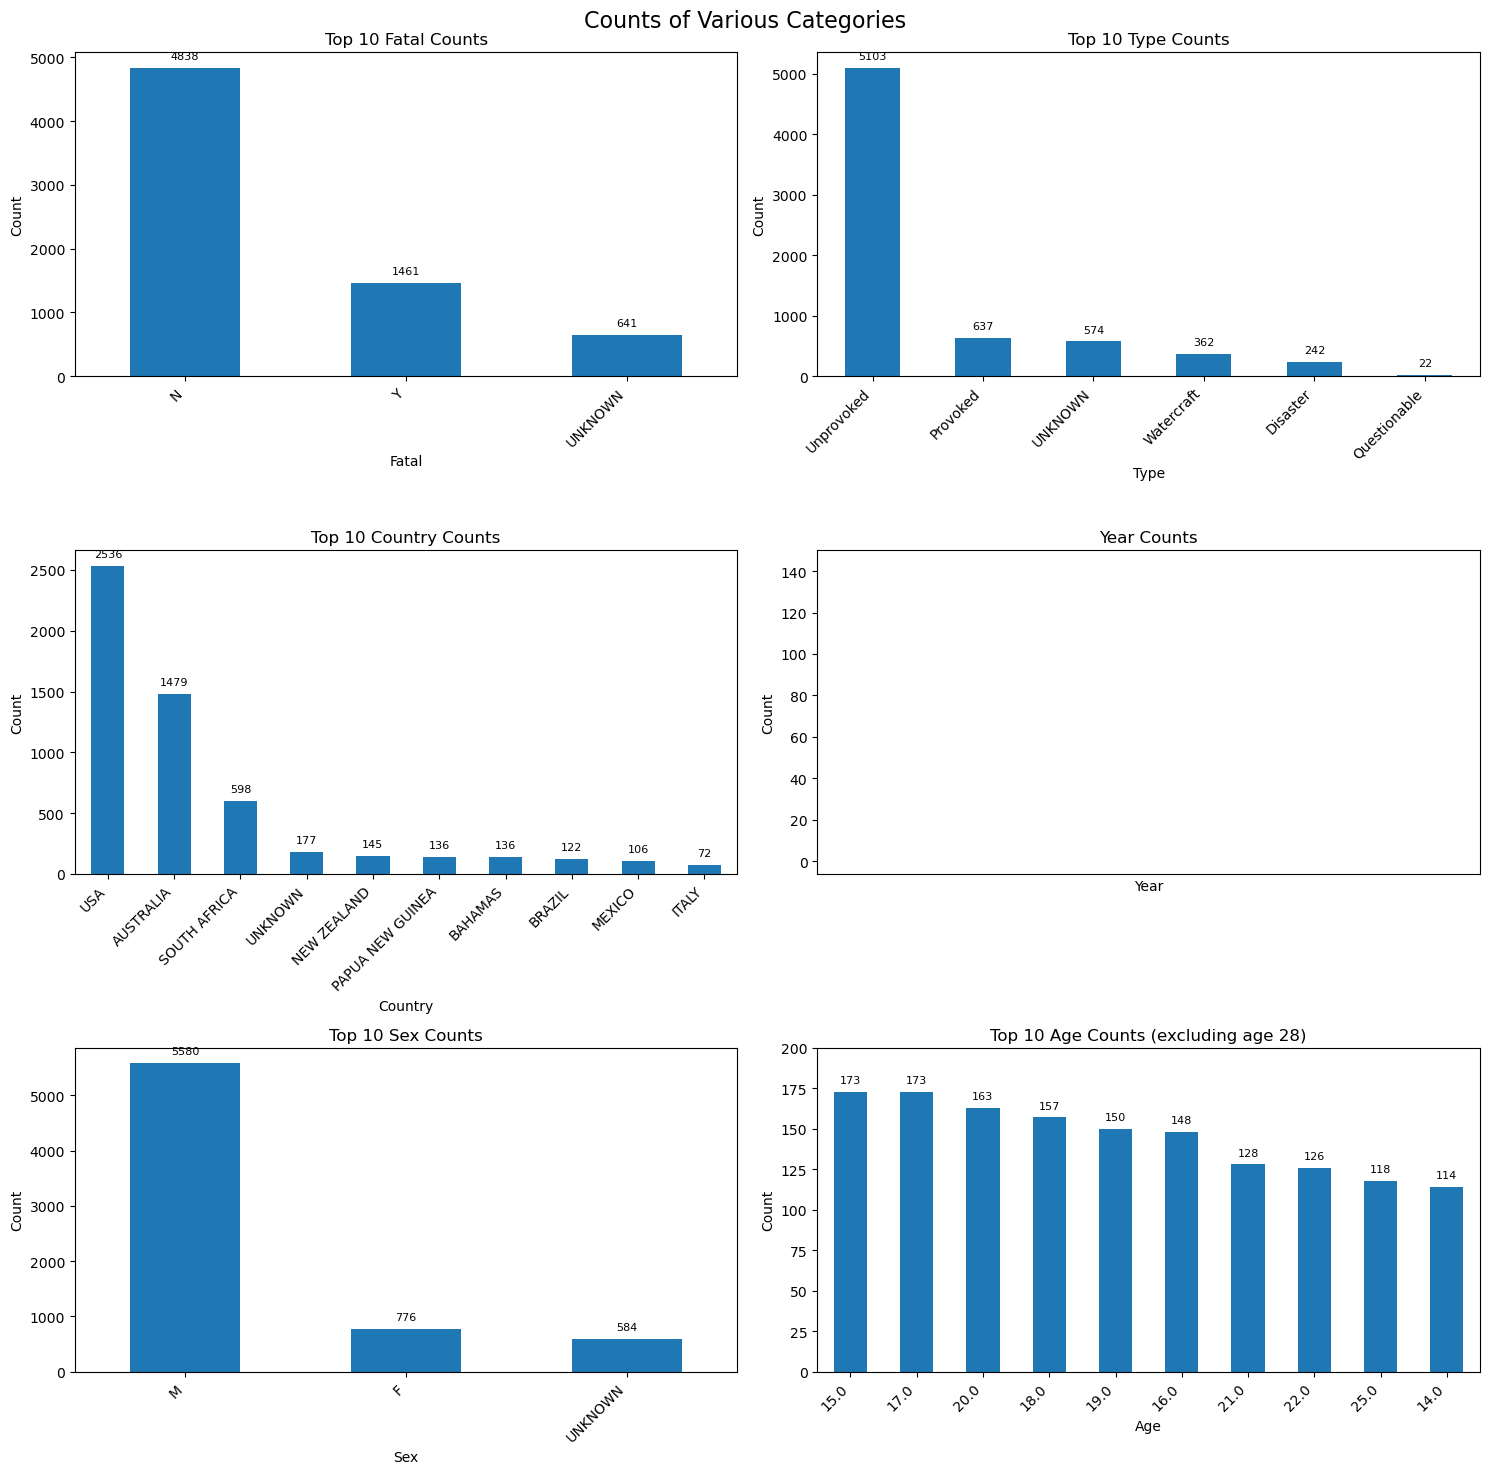

In [48]:
# Data for plots
categories = ['Fatal', 'Type', 'Country', 'Year', 'Sex', 'Age']
counts = [sharks_df[cat].value_counts() for cat in categories]

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Counts of Various Categories', fontsize=16)

for i, (category, count) in enumerate(zip(categories, counts)):
    ax = axes[i//2, i%2]
    if category == 'Year':
        # Line plot for Year
        count = count.sort_index()
        ax.plot(count.index, count.values, marker='o', linestyle='-')
        ax.set_title(f'{category} Counts')
        ax.set_xlabel(category)
        ax.set_ylabel('Count')
        ax.set_xlim(1800, 2024)
    elif category == 'Age':
        # Bar plot for Age without including age 28
        count = count[count.index != '28.0']  # Exclude age 28
        barplot = count.head(10).plot(kind='bar', ax=ax)
        ax.set_title(f'Top 10 {category} Counts (excluding age 28)')
        ax.set_xlabel(category)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(0, 200)

        # Data labels
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')
    else:
        # Bar plot for other categories
        barplot = count.head(10).plot(kind='bar', ax=ax)
        ax.set_title(f'Top 10 {category} Counts')
        ax.set_xlabel(category)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Data labels
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

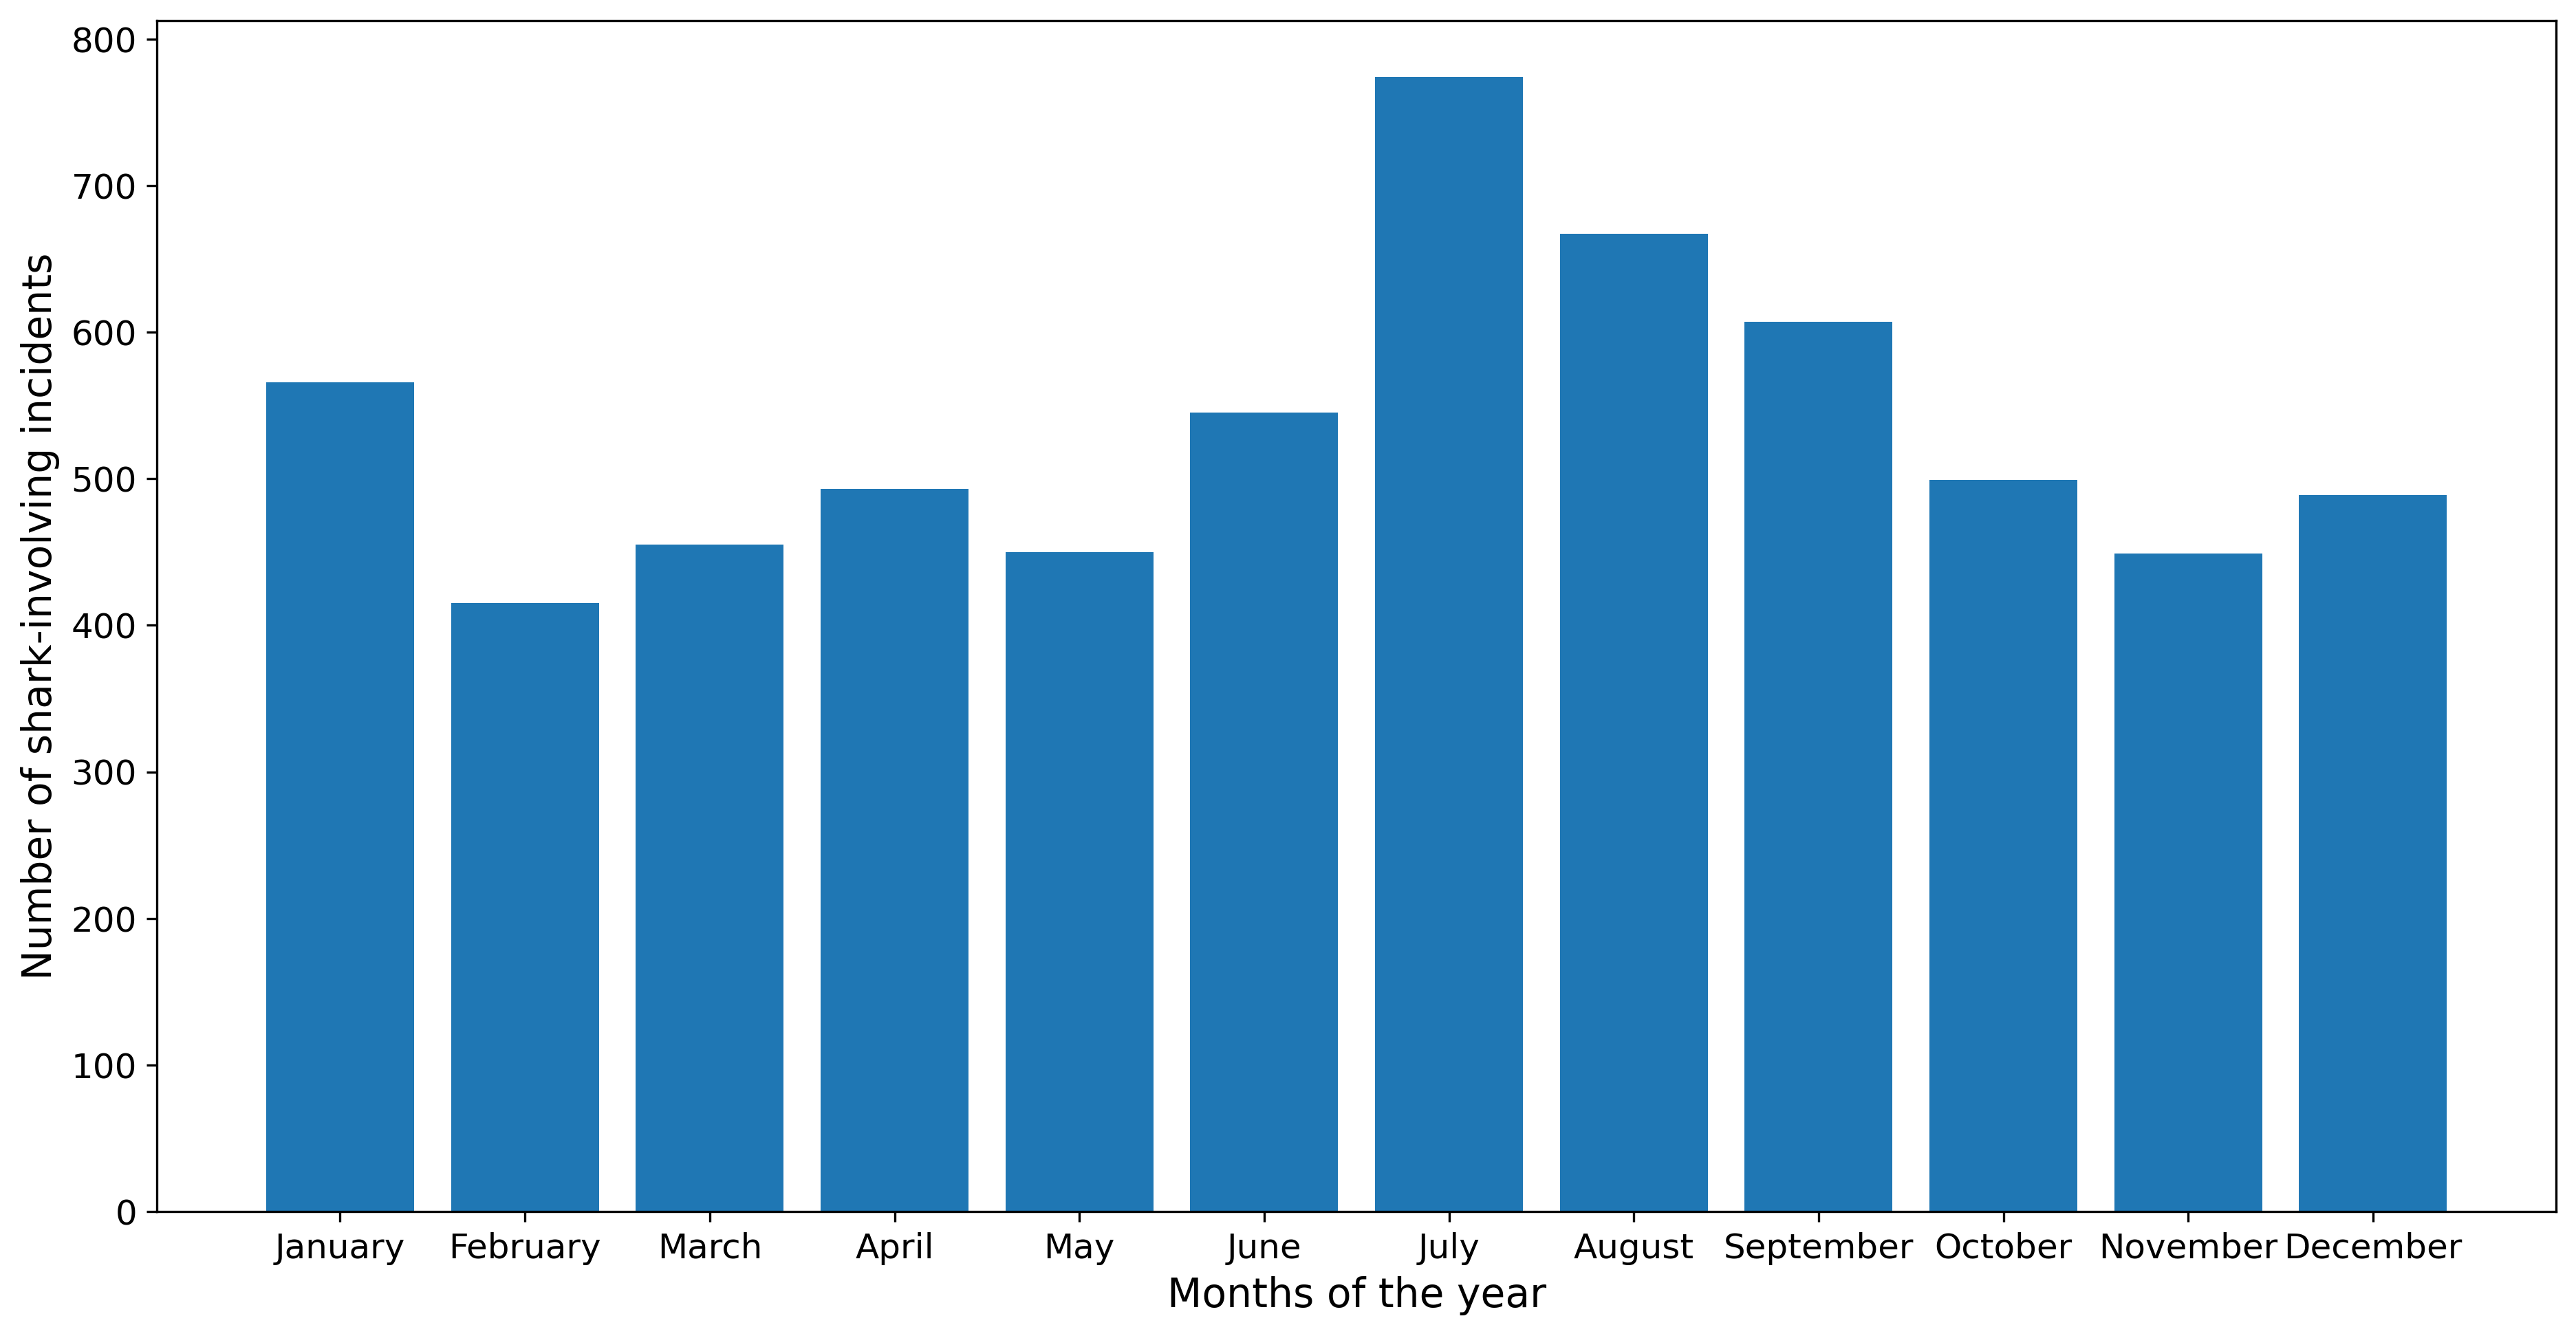

In [39]:
#Shark Incidents per Mont
fig, ax = plt.subplots(figsize=(15,7.5),dpi=300)
plt.bar(list_months_of_year,months_count)
plt.xlabel("Months of the year", fontsize = 14)
plt.ylabel("Number of shark-involving incidents", fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=12)


plt.savefig("bar_plot_shark_incidents_month.png")

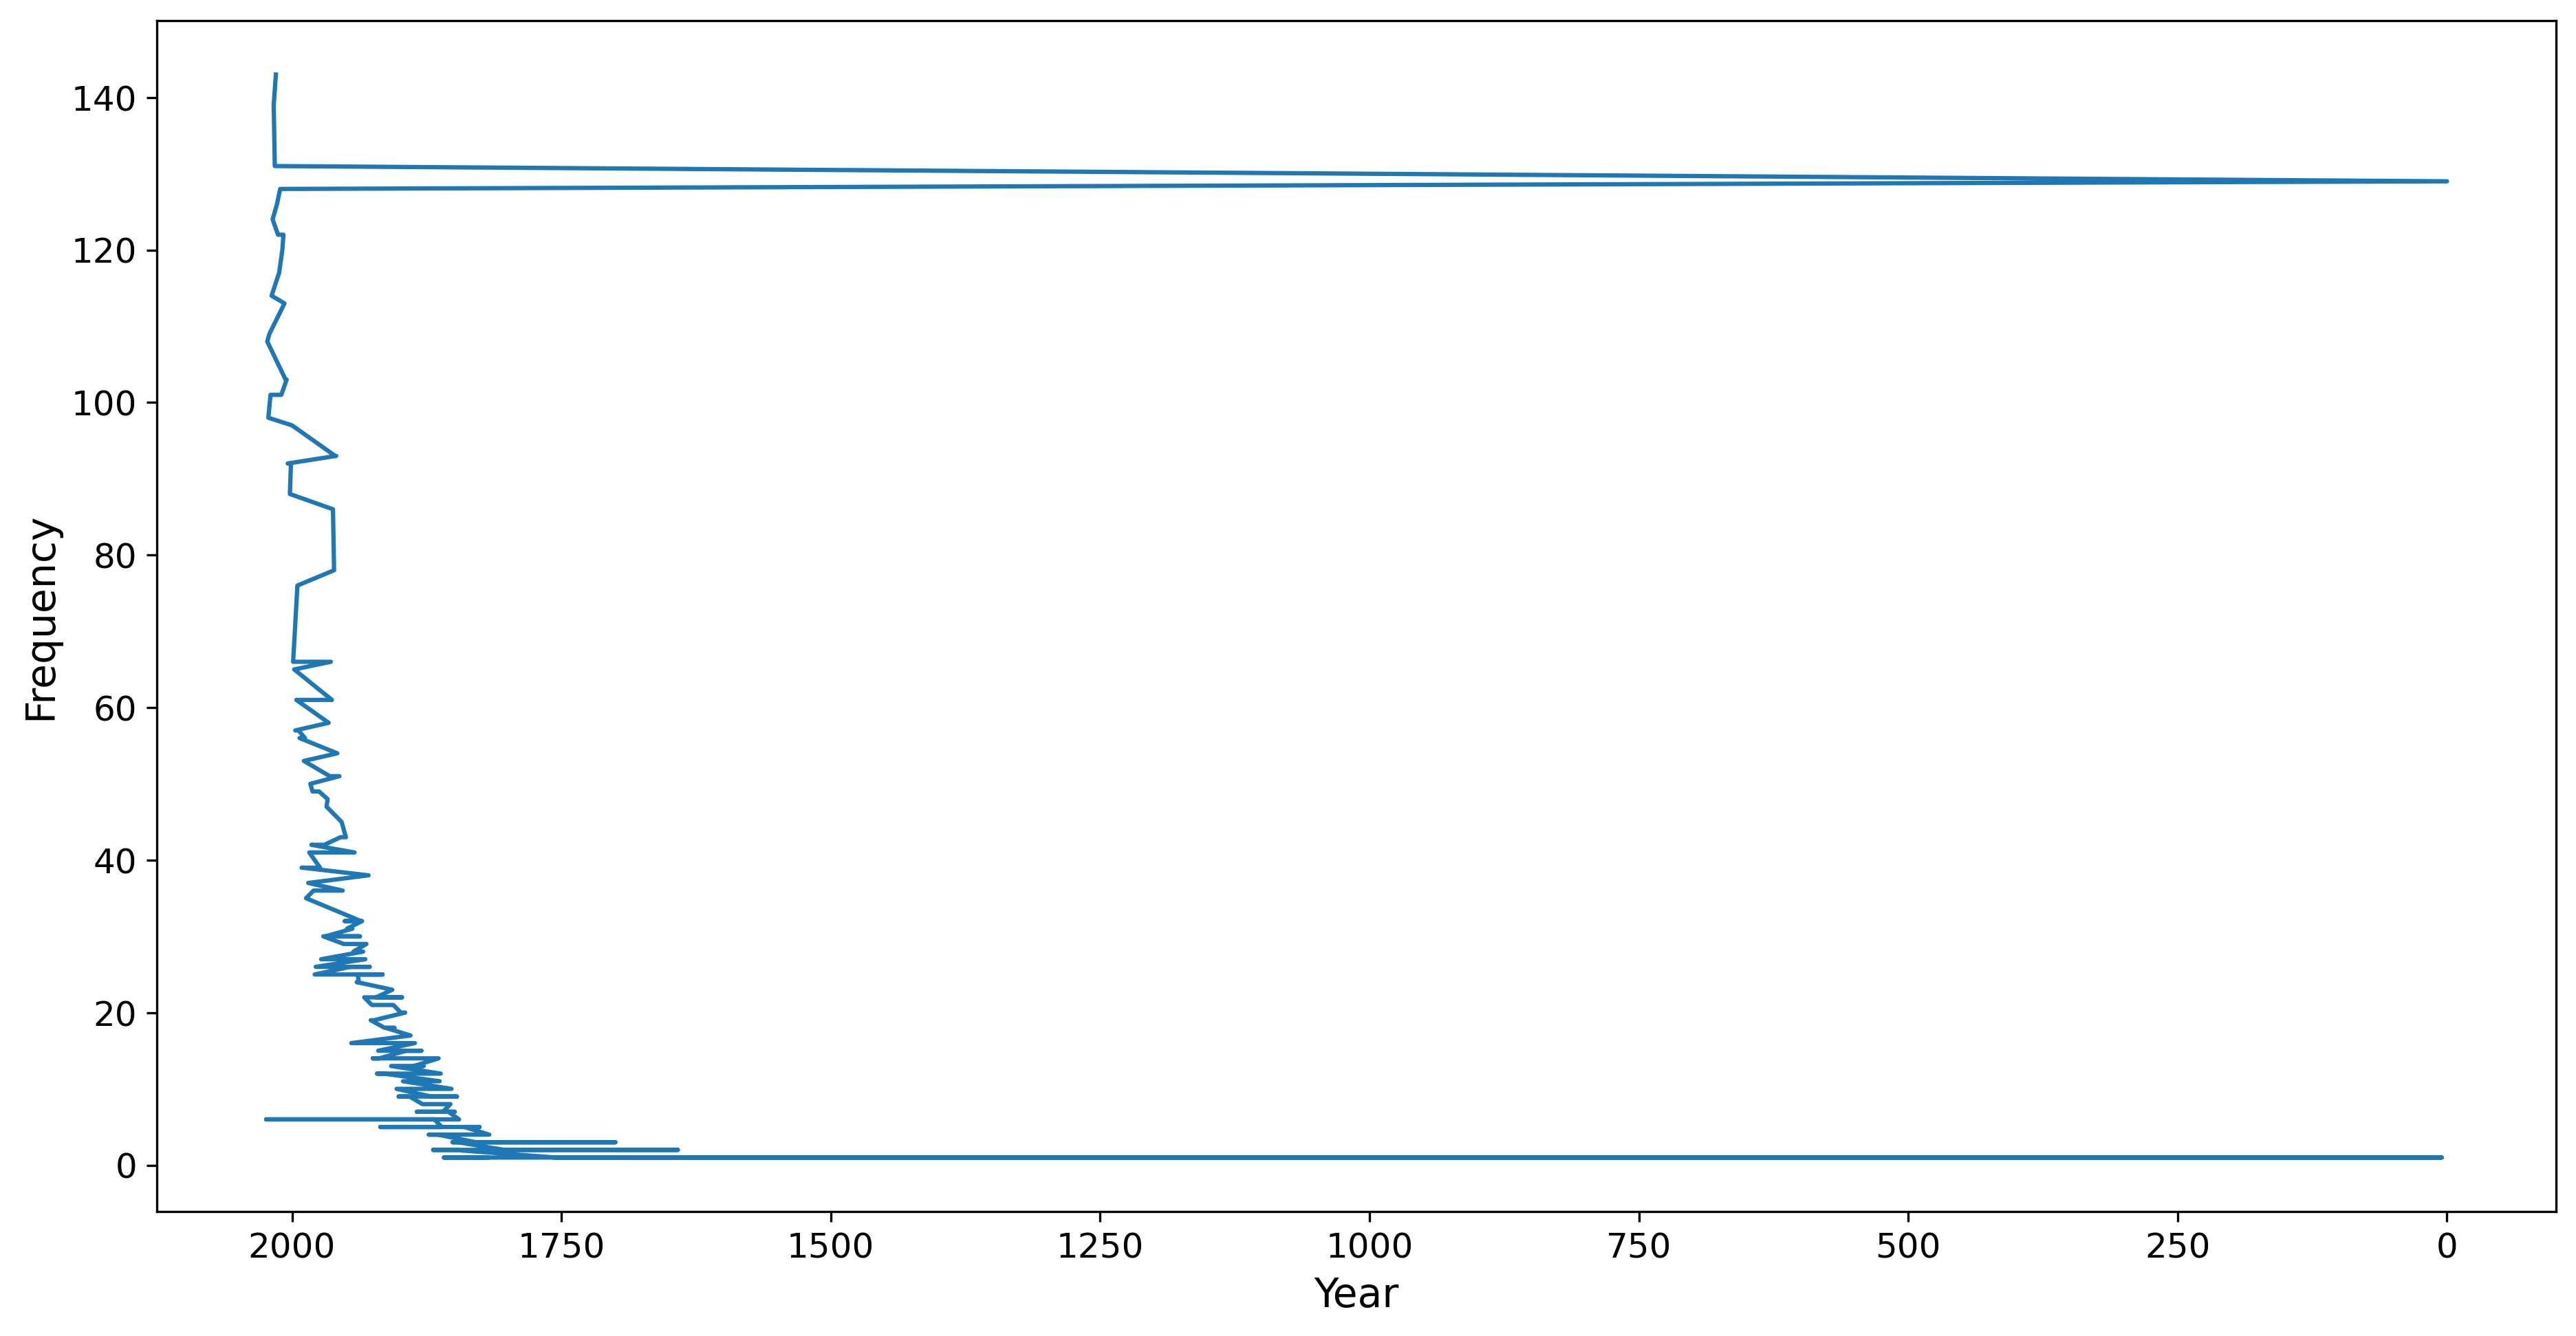

In [40]:
#Yearly Evolution of Shark Attacks

fig, ax = plt.subplots(figsize=(15,7.5),dpi=300)

df_year_counts.plot().invert_xaxis()

#plt.plot(df_year_counts["index"])
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=12)
#

plt.savefig("shark_incidents_per_year.png")


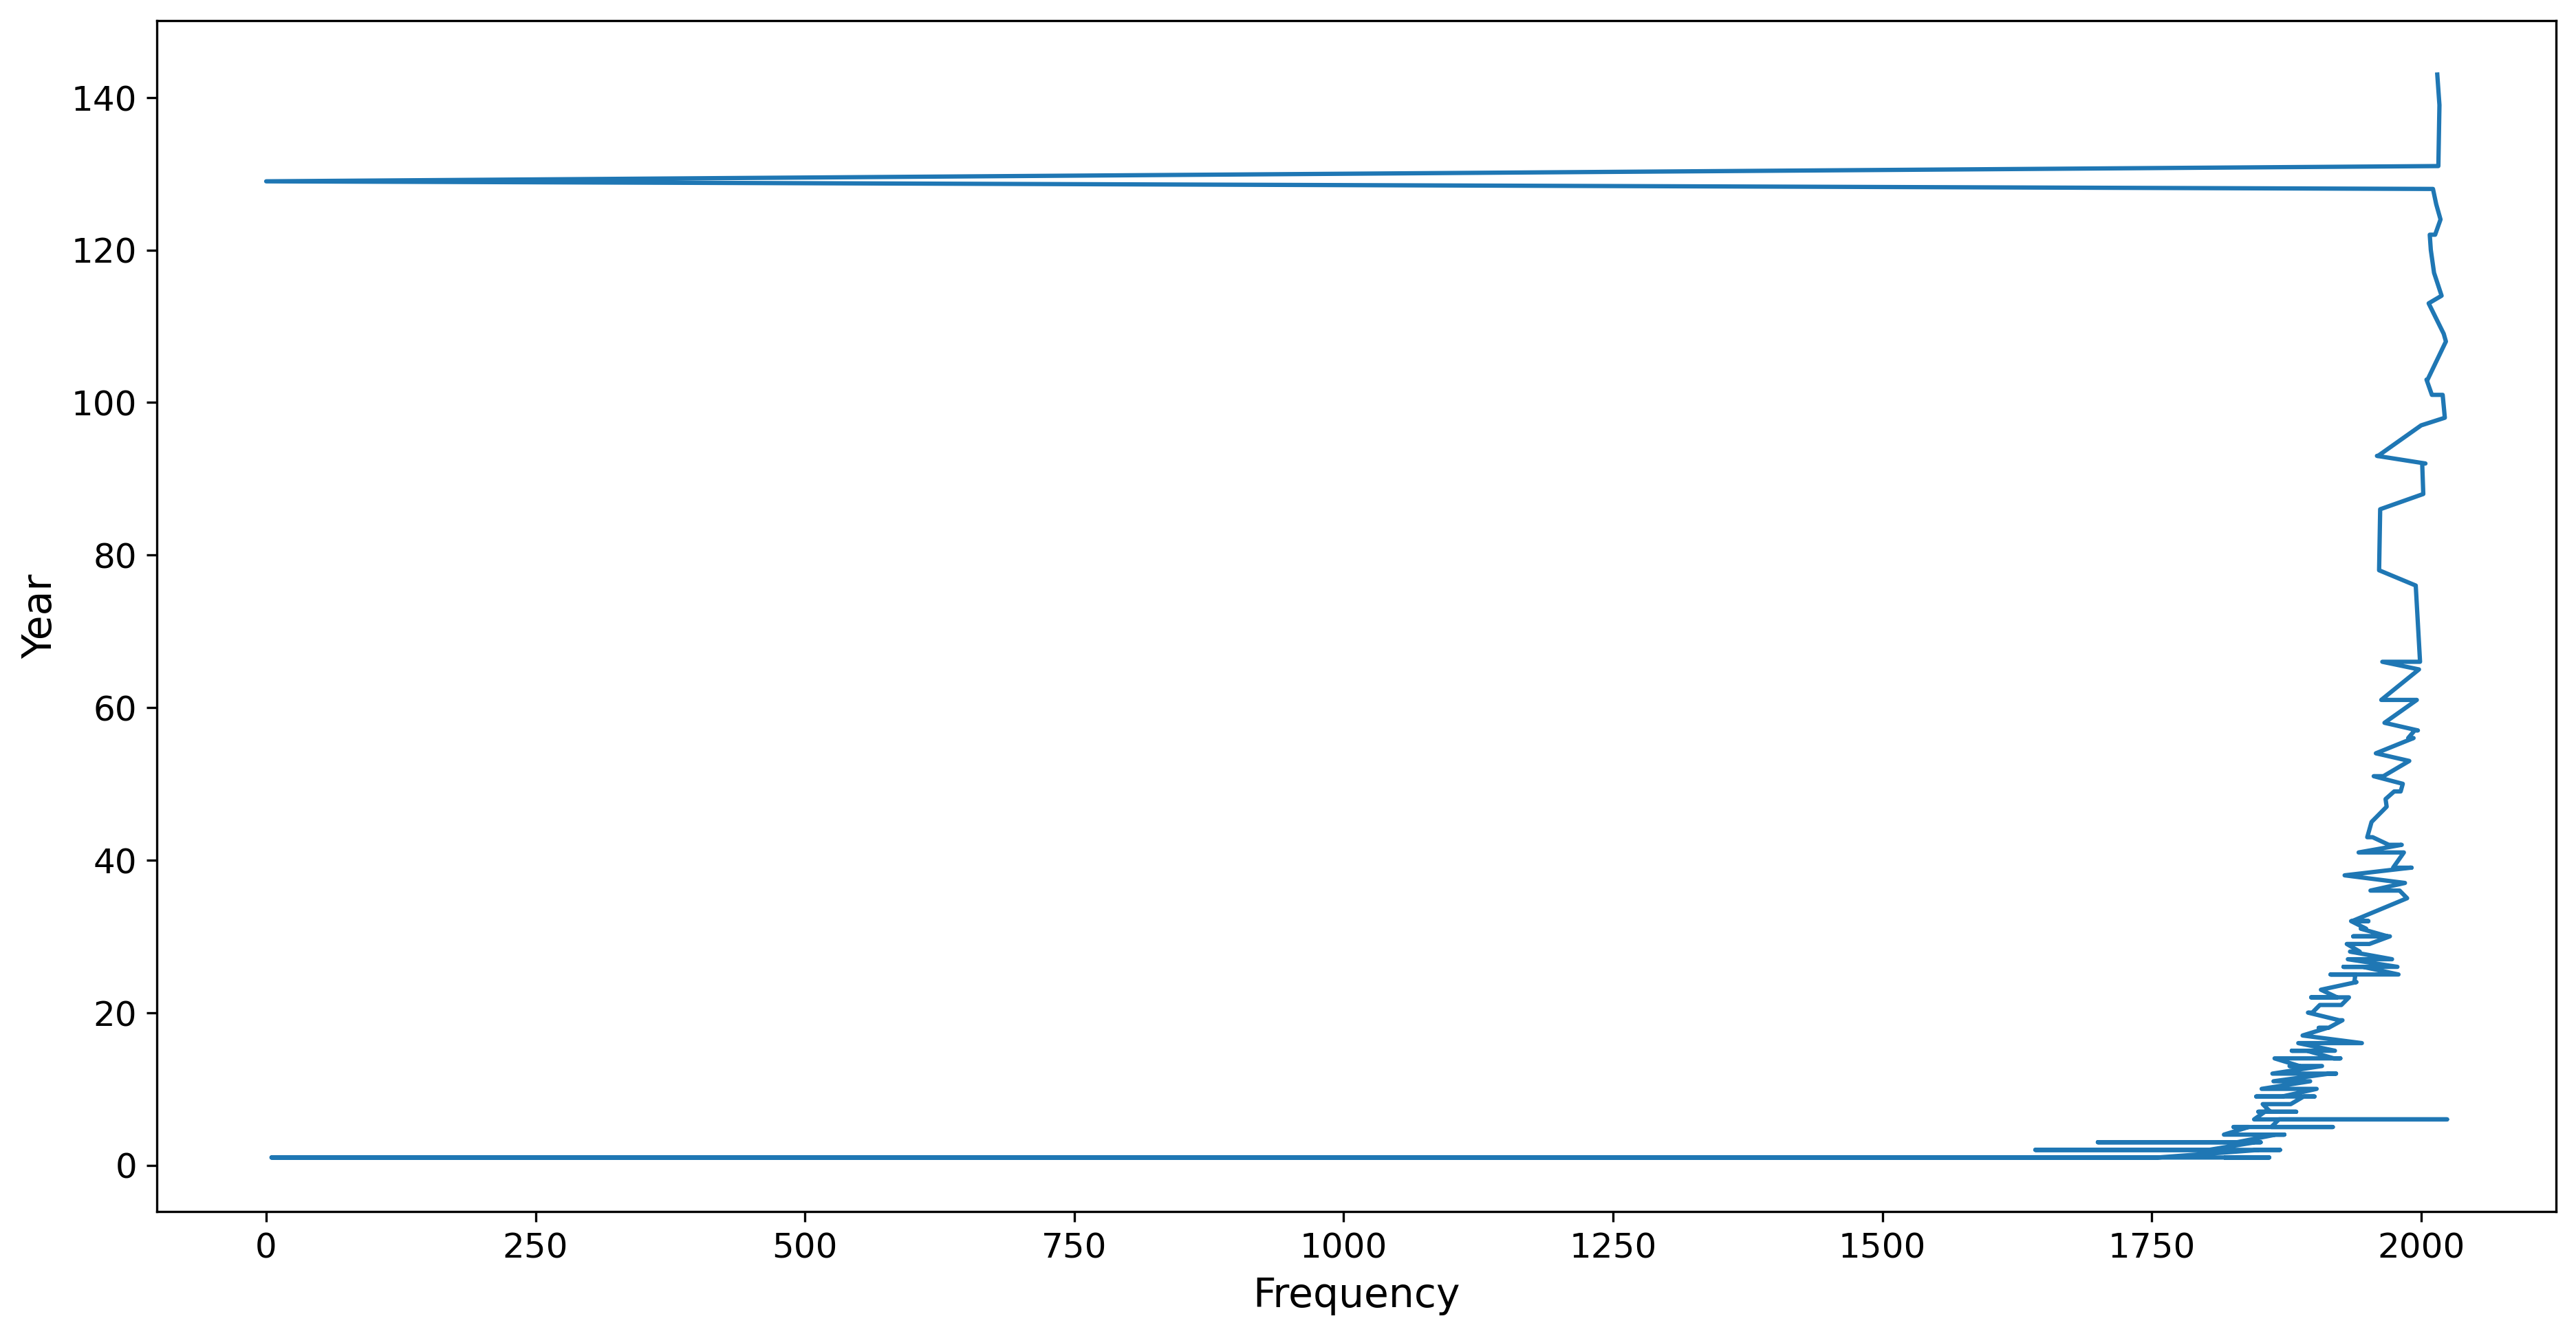

In [41]:
# Yearly Evolution of Shark Attacks
fig, ax = plt.subplots(figsize=(15, 7.5), dpi=300)

# Plot with x and y arguments inverted
df_year_counts.plot(ax=ax, x='Frequency', y='index')

plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Year", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("shark_incidents_per_year.png")

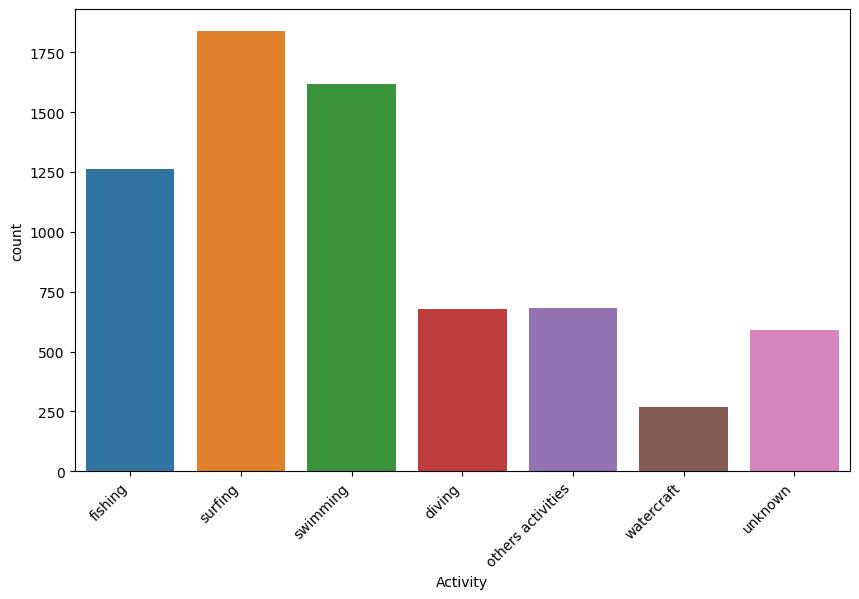

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=sharks_df)

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

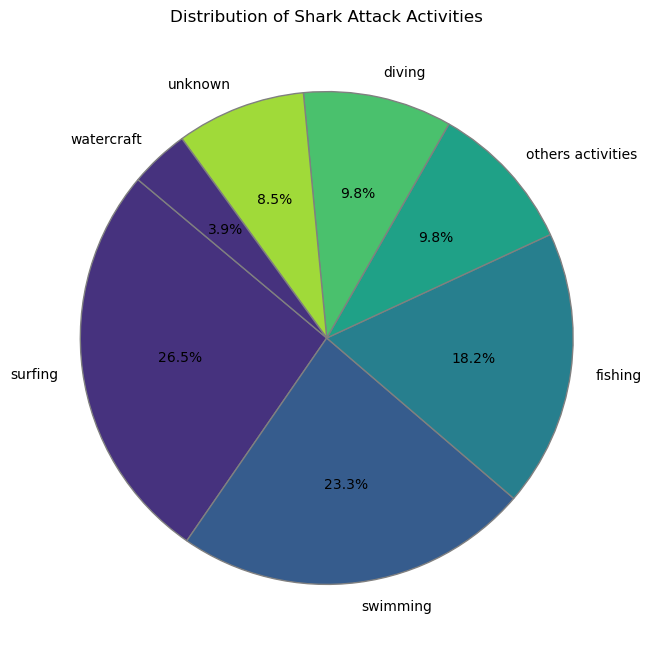

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sharks_df' is your DataFrame
plt.figure(figsize=(8, 8))  # Set the size of the plot
activity_counts = sharks_df['Activity'].value_counts()  # Count the occurrences of each activity
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'), wedgeprops={'edgecolor': 'grey'})  # Create the pie chart with Seaborn's color palette
plt.title('Distribution of Shark Attack Activities')  # Add a title

plt.show()  # Display the pie chart